In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
img = cv2.imread('barrel1.png',1)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
original = cv2.imread('barrel.png',1)
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original_hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)

In [10]:
hsv_hist = cv2.calcHist([img_hsv],[0,1],None,[180,256],[0,180,0,256])
mask = cv2.calcBackProject([original_hsv],[0,1],hsv_hist,[0,180,0,256],1)
#plt.figure(),plt.axis("off"),plt.title("mask"),plt.imshow(mask)
#plt.show()

In [11]:
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
filtered = cv2.filter2D(mask, -1, disc)
#plt.figure(),plt.axis("off"),plt.title("output"),plt.imshow(filtered, cmap='gray')
#plt.show()
#print(filtered)

In [12]:
_,thresh = cv2.threshold(filtered, 50, 255, cv2.THRESH_BINARY)
#plt.figure(),plt.axis("off"),plt.title("thresholded"),plt.imshow(thresh, cmap='gray')
#plt.show()
#print(thresh)

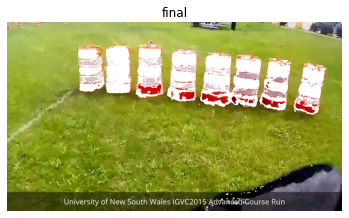

In [13]:
final = cv2.merge((thresh,thresh,thresh))
result = cv2.bitwise_or(original_rgb, final)
plt.figure(),plt.axis("off"),plt.title("final"),plt.imshow(result, cmap = 'gray')
plt.show()

In [14]:
#the below code is made from combining above cells which is to be executed in a python IDE that supports usage of cv2.imshow function
#end result is a video with only the barrels seen
'''img = cv2.imread('barrel1.png',1)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv_hist = cv2.calcHist([img_hsv],[0,1],None,[180,256],[0,180,0,256])
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
vid = cv2.VideoCapture('video.mp4')
while vid.isOpened():
    bool, original = vid.read()
    if bool:
        original_hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)
        mask = cv2.calcBackProject([original_hsv],[0,1],hsv_hist,[0,180,0,256],1)
        filtered = cv2.filter2D(mask, -1, disc)
        _,thresh = cv2.threshold(filtered, 50, 255, cv2.THRESH_BINARY)
        final = cv2.merge((thresh,thresh,thresh))
        result = cv2.bitwise_and(original, final)
        cv2.imshow("result",result)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()'''

'img = cv2.imread(\'barrel1.png\',1)\nimg_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)\nhsv_hist = cv2.calcHist([img_hsv],[0,1],None,[180,256],[0,180,0,256])\ndisc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))\nvid = cv2.VideoCapture(\'video.mp4\')\nwhile vid.isOpened():\n    bool, original = vid.read()\n    if bool:\n        original_hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)\n        mask = cv2.calcBackProject([original_hsv],[0,1],hsv_hist,[0,180,0,256],1)\n        filtered = cv2.filter2D(mask, -1, disc)\n        _,thresh = cv2.threshold(filtered, 50, 255, cv2.THRESH_BINARY)\n        final = cv2.merge((thresh,thresh,thresh))\n        result = cv2.bitwise_and(original, final)\n        cv2.imshow("result",result)\n        if cv2.waitKey(10) & 0xFF == ord(\'q\'):\n            break\n    else:\n        break\ncap.release()\ncv2.destroyAllWindows()'